# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, recall_score,precision_score,accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn import metrics

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/MIT Program Files/Colab Notebooks/Elective Project/ExtraaLearn.csv")
df.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

In [ ]:
df.nunique()

,0
ID,4612
age,46
current_occupation,3
first_interaction,2
profile_completed,3
website_visits,27
time_spent_on_website,1623
page_views_per_visit,2414
last_activity,3
print_media_type1,2


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['status'].value_counts(normalize=True)

,proportion
status,
0,0.701431
1,0.298569


### Observations:
* Fortunately, the dataset that we have been given has no missing values.
* There are also no duplicated records in our data table.
* We have 3 main datatypes in our dataset: *float*, *int*, and *objects*
* ID is equal to the number of rows in the data, signifying a unique expression per customer. This information does not help with our analysis and can be dropped.
* The average **Age** of a customer is about 46 years old.

#### Data Preprocessing
* **First Interaction**, **Current Occupation**, **Last Activity**, and **Profile Completed** are all categorical variables and will need to be preprocessed by using the one-hot encoding technique
  
* Different numerical data types may need to be standardized.
**print_media_type1**, **print_media_type2**, **digital_media**, **educational_channels**, and **referral** each have values such as *'Yes'* or *'No'*, so they will need to be mapped to **Yes: 1 and No: 0**

* The distribution for our target variable ('**Status**') has a strong bias towards class 0, which is the class that did not convert into being a paid customer. This issue needs to be addressed to prevent bias in the data.


## Univariate Analysis
We will begin by examining each variable independently to gather more information about its distribution in the data.

First, we will start with the categorical variables.

In [ ]:
# Create a function for countplot then loop all the categorical variables to it
def countplot_ann(a):
    ''' This Function is designed to create an annotated countplot for categorical values'''
    plt.figure(figsize=(6,4))
    ax = sns.countplot(data = df,x = a,palette = 'rocket_r')


    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:,.0f}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', fontsize=10, fontweight='bold')

    plt.ylabel('Total Count')
    plt.show()
    return

In [ ]:
# Creating a new variable to store categorical values.
df_cat = df[['current_occupation','first_interaction','profile_completed','last_activity','print_media_type1','print_media_type2','digital_media','educational_channels','referral','status']]

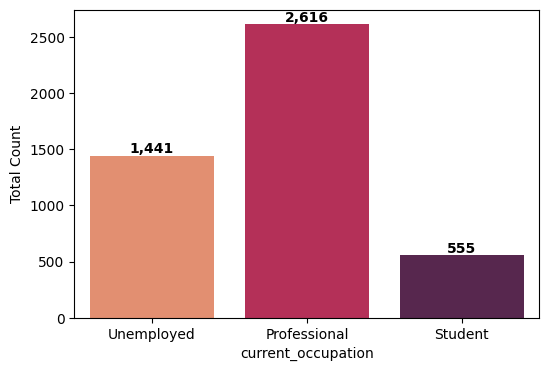

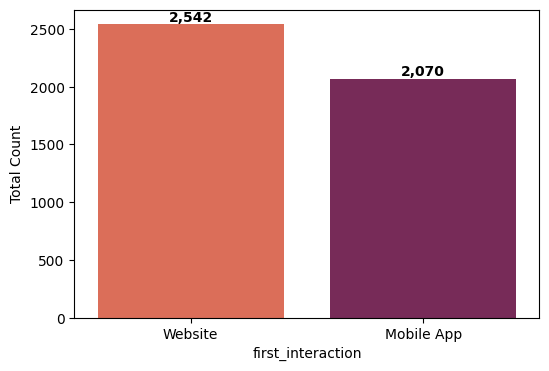

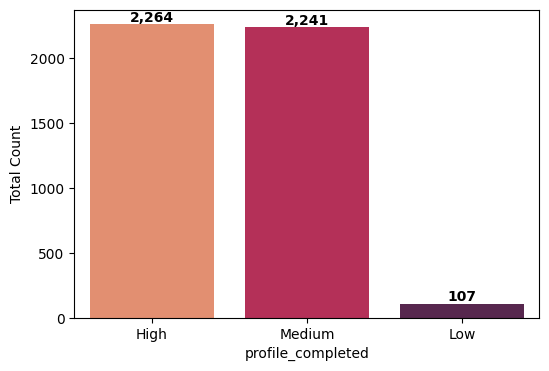

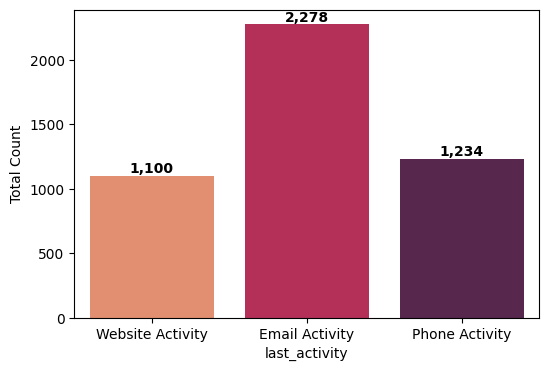

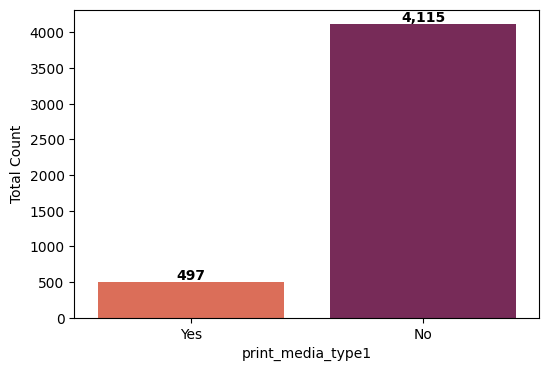

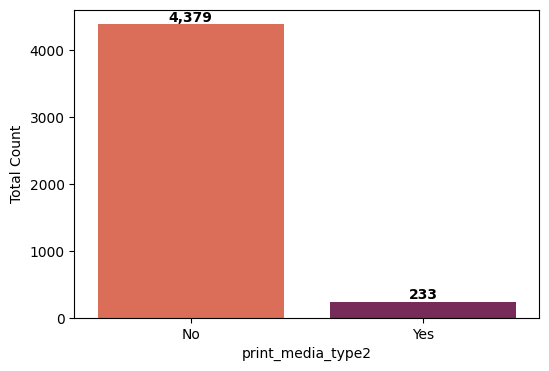

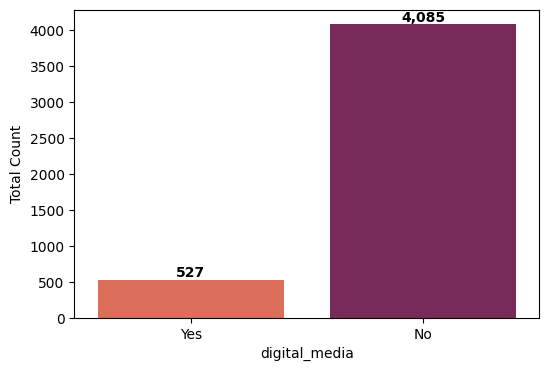

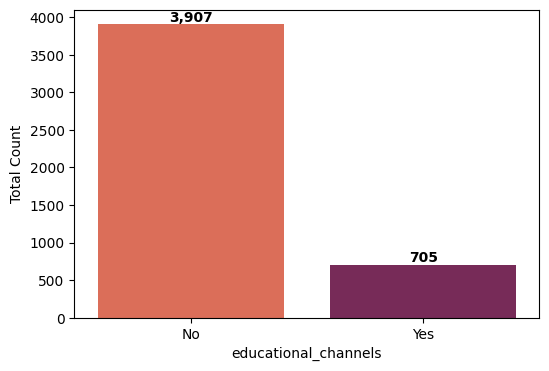

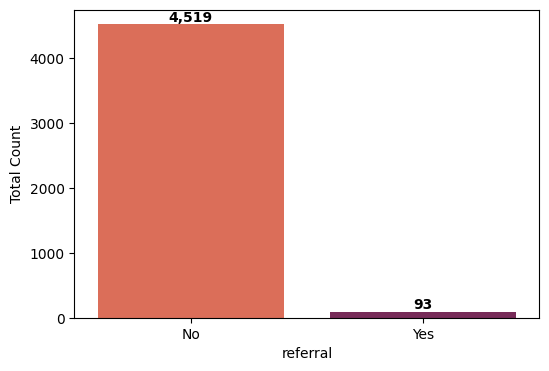

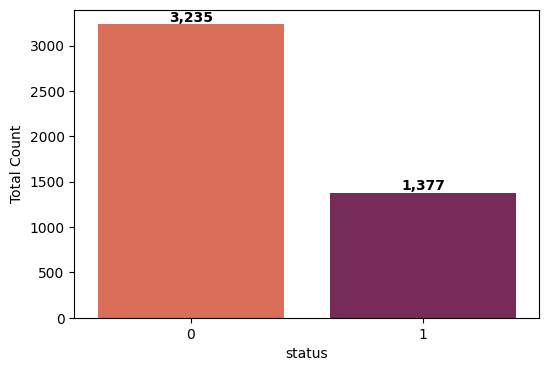

In [ ]:
for i in df_cat:
    countplot_ann(i)
    print('')
    print('')
    print('')
    print('')
    print('')

### Observations:
* Among all occupation statuses, **Professional** ranks highest, followed by **Unemployed** and **Student**.

* **Website** ranks over **Mobile** app when a customer first interacts with the website (check this)

* Among the profiles that are completed, **High** and **Medium** rank fairly close, while the population of customers that have a **Low** complete profile is small.

* **Email** activity ranks highest over **Phone** and **Website** among the last_activity

* The data shows that more people had not seen the ad via the **Newspaper** versus seeing the **Newspaper**

* The same can be said for the **Magazine Flag**. The data displays that customers did not see an ad for magazines.

* The data also shows that a large number of people did not view an ad on a **digital platform** versus seeing one.

* **Educational Channels** also show that far fewer people have seen an ad on either a blog, forum, or discussion thread

* **Referrals** show that individuals hardly hear about ExtraaLearn through a reference.

### Univariate Analysis for Numerical Values

In [ ]:
df_num = df[['age','time_spent_on_website','website_visits','page_views_per_visit']]

In [ ]:
#defining a function to create a histogram and box plot

def hist_box(a,b):
    """ This function is designed to create a histogram and box plot side by side to view the distribution of the continuous numbers"""
    fig,ax = plt.subplots(1,2 ,figsize=(10,5))

    sns.histplot(data = a,x = b, kde=True,color='seagreen',ax=ax[0])
    ax[0].set_title(f'Histogram with KDE')

    sns.boxplot(data=a,x=b,color='skyblue',ax=ax[1])
    ax[1].set_title(f'BoxPlot')

    plt.tight_layout()
    plt.show()
    return

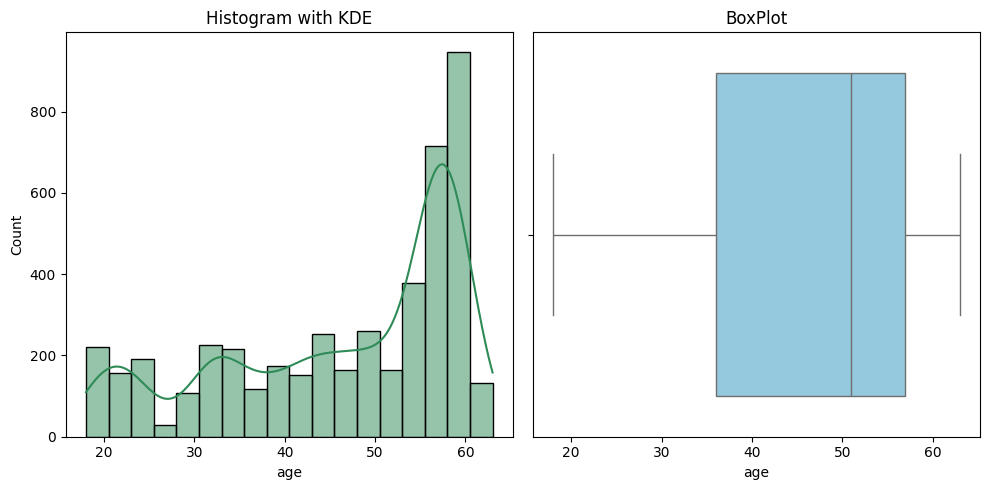

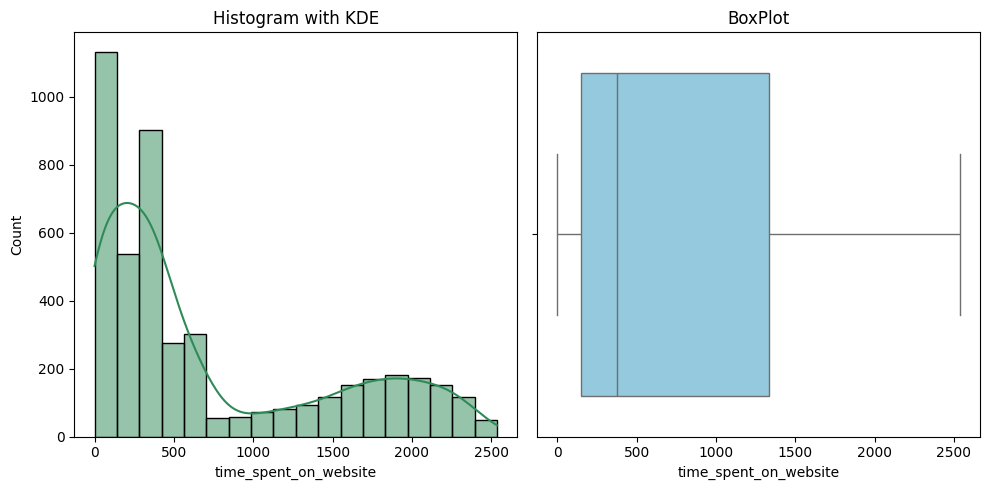

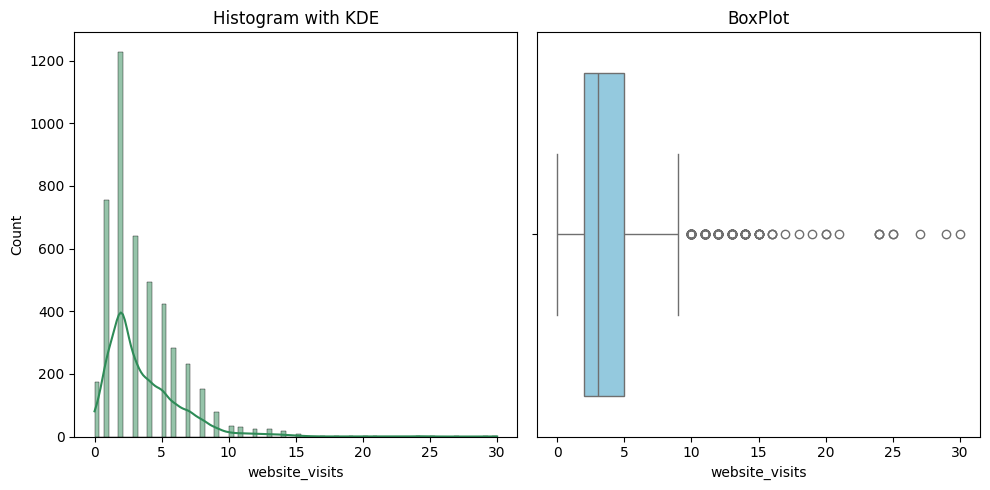

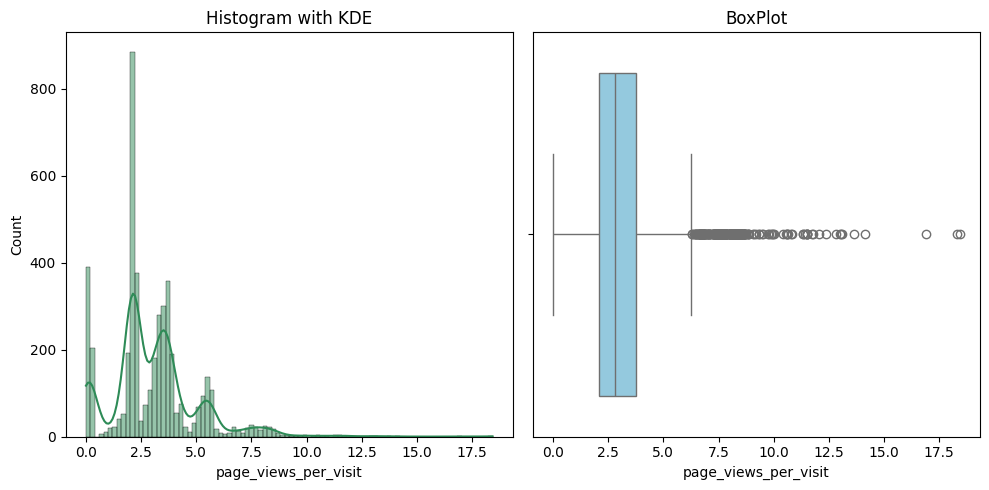

In [ ]:
# Using a for loop to loop through each column in the numeric variables
for i in df_num:
    hist_box(df_num,i)
    print('')
    print('')
    print('')
    print('')
    print('')

### Observations
* The **Age** values tend to skew towards the *left*; there are more older individuals who participate in ExtraaLearn, of which hover around 55-60 years of age.
* Time spent on the ExtraaLearn website skews to the *right*. Indicating that there are lower levels of website activity.
* Website visits also skew towards the *right*, showing that of the website visits that are present, people tend to visit around 0 to 5 times.
* **Page Views Per Visit** has a *right-skewed* distribution that has an average of about 2.6 views per visit


## Multi-Variate Analysis
Lastly, we'll start examining the relationships between the variables in our dataset and answer a few prompt questions:

## Question 1
- Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.

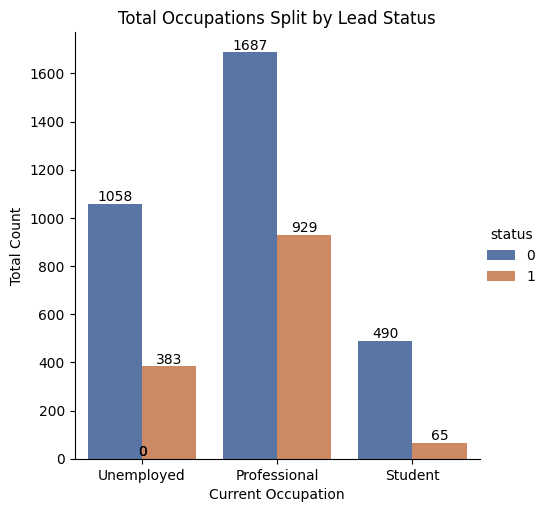

In [ ]:

g = sns.catplot(data=df, x='current_occupation', kind='count', hue='status', palette='deep')

for ax in g.axes.flat:
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom')

plt.xlabel('Current Occupation')
plt.ylabel('Total Count')
plt.title('Total Occupations Split by Lead Status')
plt.show()

### Observations:

The bar chart above displays the relationship between the current occupation present in the data set and the lead status
- Some observations we can see is that for all three occupations, we see that there are more individuals that do not convert to a lead than there are that do.
- However, we can see that an Individual that is a **Professional** is more likely to become a lead

## Question 2

The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?

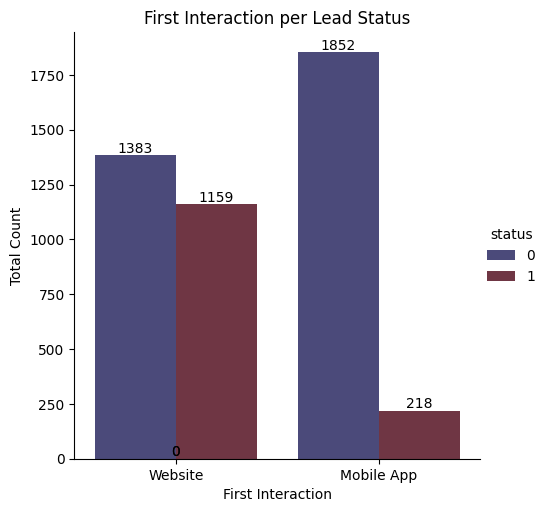

In [ ]:
g = sns.catplot(data=df, x='first_interaction', kind='count', hue='status', palette='icefire')
for ax in g.axes.flat:
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{int(height)}',xy = (p.get_x() + p.get_width() / 2,height),ha='center',va='bottom')
plt.xlabel('First Interaction')
plt.ylabel('Total Count')
plt.title('First Interaction per Lead Status')
plt.show()

### Observations:
The bar chart above represents the two types of First Interaction and their lead conversion.
- We can see that of the two types of first interactions, **Website** is more likely to convert over the mobile app


## Question 3
- The company uses multiple modes to interact with prospects. Which way of interaction works best?


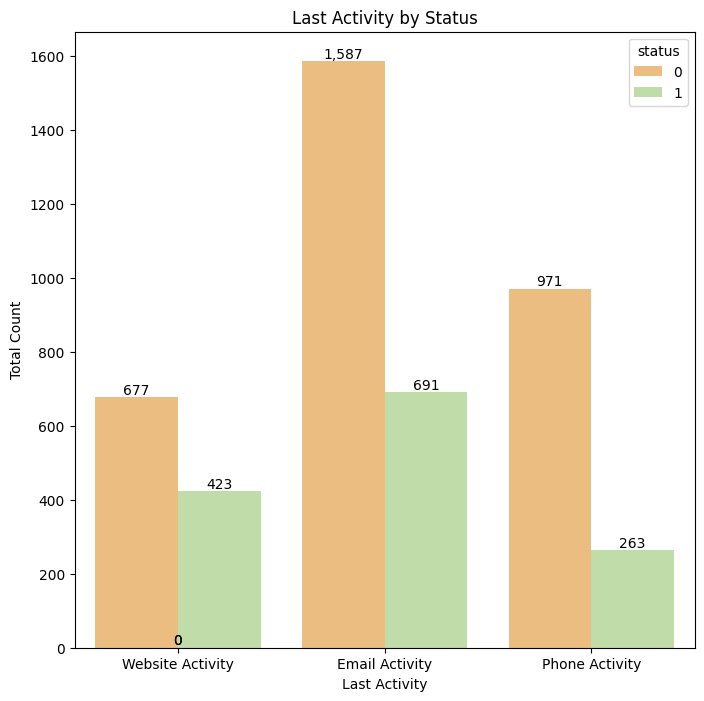

In [ ]:
plt.figure(figsize=(8,8))
ax = sns.countplot(df,x='last_activity',hue='status',palette = 'Spectral')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height):,}',(p.get_x() + p.get_width() / 2,height),ha='center',va='bottom')
plt.xlabel('Last Activity')
plt.ylabel('Total Count')
plt.title('Last Activity by Status')
plt.show()

### Observations:
- Of the three ways Extraalearn can communicate with prospects, **Email Activity** where prospects seek for details about the program through email, has the highest converting percentage at about *50%* of converting leads.
  
- Leaving **Website Activity** and **Phone Activity** converting at *30%* and *19%* respectively


## Question 4

The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?

In [ ]:
media_status = df[['print_media_type1', 'print_media_type2', 'digital_media', 'referral','status']]

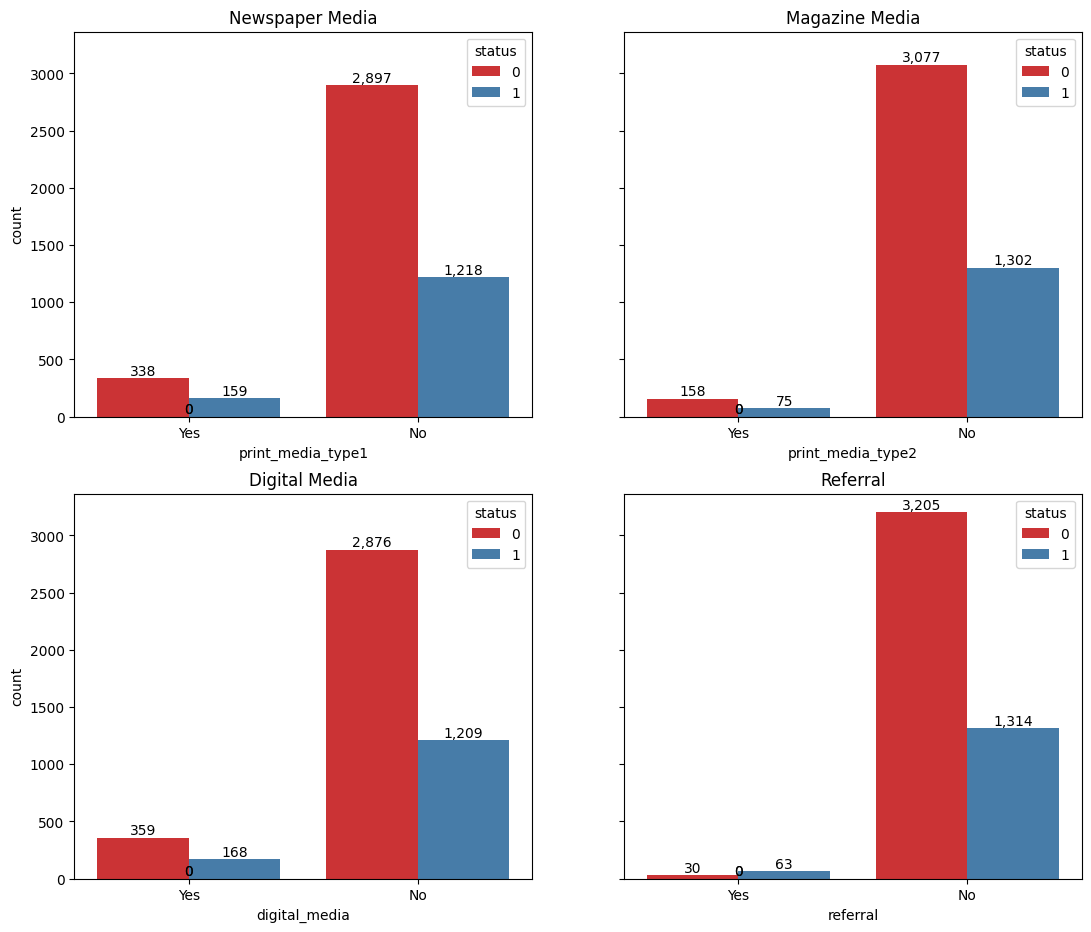

In [ ]:
fig,ax = plt.subplots(2,2, figsize=(13,11),sharey=True)

order = ['Yes','No']
axis = sns.countplot(media_status,x='print_media_type1',ax=ax[0,0],palette = 'Set1',order = order , hue = 'status')
ax[0,0].set_title('Newspaper Media')

for p in axis.patches:
    height = p.get_height()
    axis.annotate(f'{int(height):,}',(p.get_x() + p.get_width() / 2,height), ha='center',va='bottom')


axis1 = sns.countplot(media_status,x='print_media_type2',ax=ax[0,1],palette= 'Set1',order = order, hue = 'status')
ax[0,1].set_title('Magazine Media')

for p in axis1.patches:
    height = p.get_height()
    axis1.annotate(f'{int(height):,}',(p.get_x() + p.get_width() / 2,height), ha='center',va='bottom')

axis2 = sns.countplot(media_status,x='digital_media',ax=ax[1,0],palette='Set1',order = order, hue = 'status' )
ax[1,0].set_title('Digital Media')

for p in axis2.patches:
    height = p.get_height()
    axis2.annotate(f'{int(height):,}',(p.get_x() + p.get_width() / 2,height), ha='center',va='bottom')


axis3 = sns.countplot(media_status,x='referral',ax=ax[1,1],palette='Set1',order = order, hue = 'status' )
ax[1,1].set_title('Referral')

for p in axis3.patches:
    height = p.get_height()
    axis3.annotate(f'{int(height):,}',(p.get_x() + p.get_width() / 2,height), ha='center',va='bottom')
plt.show()

### Observations:
* The conversion rate for the customers that viewed a **Newspaper ad** and later converted is **31.9%**  *(159 / 497 X 100)*
* The conversion rate for the customers that viewed a **Magazine ad** and later converted is **32.1%**  *(75 / 233 X 100)*
* The conversion rate for the customers that viewed a **Digital ad** and later converted is **31.8%**  *(168 / 527 X 100)*
* The conversion rate for the customers that received a **Referral** and later converted is **67.7%**  *(63 / 93 X 100)*


## Question 5
- People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information. Does having more details about a prospect increase the chances of conversion?

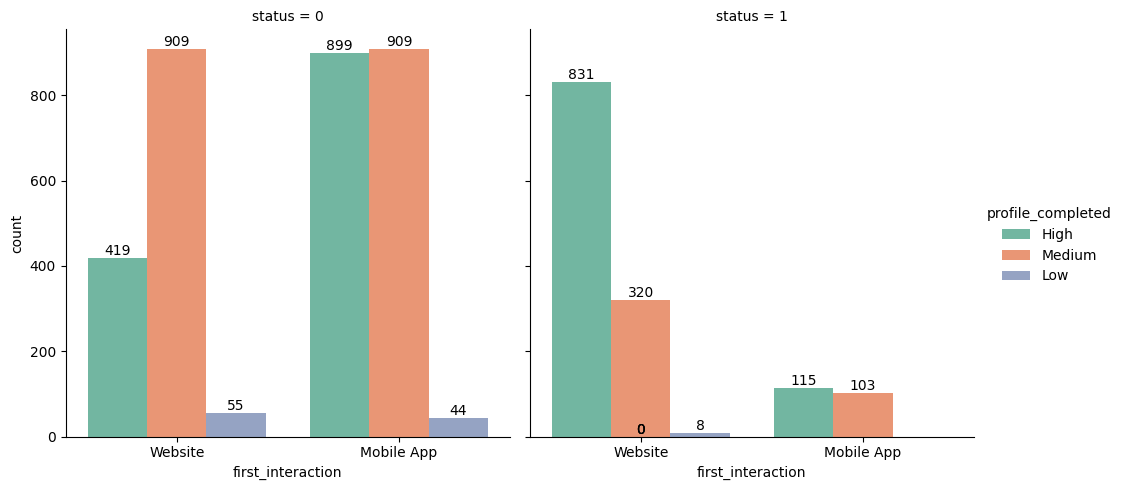

In [ ]:
g = sns.catplot(df,x='first_interaction',kind='count',hue='profile_completed',col ='status',palette = 'Set2')

for ax in g.axes.flat:
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{int(height)}',xy = (p.get_x() + p.get_width() / 2,height),ha='center',va='bottom')

plt.show()

### Observations:

* For **Website** Browsers:
    - Customers with a *Low* completed profile converted **.69%**

    - Customers with a *Medium* completed profile converted **27.6%**

    - Customers with a *High* converted **71.6%**

* For **Mobile App** Browsers:
    - There were no customers with a *Low* completed profile.

    - Customers with a *Medium* completed profile converted **47.2%**

    - Customers with a *High* converted **52.7%**

Based off the conversion rates of customers that became a lead, we can say for both *Website* and *Mobile* app, when a customer has a **High** completed profile, they are more likely to convert into a lead.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [ ]:
#Removing unnecessary variables

df.drop(columns = 'ID',axis=1,inplace=True)

In [ ]:
# Preforming One-Hot Encoding for all categorical variables

X_dummies = pd.get_dummies(df,columns=['current_occupation','first_interaction','profile_completed','last_activity'])

In [ ]:
# Mapping Yes No Variables to 1 and 0
yn_map = {'Yes':1,
          'No':0}

cols_yn =['print_media_type1','print_media_type2','digital_media','educational_channels','referral']

X_dummies[cols_yn] = X_dummies[cols_yn].applymap(yn_map.get)

In [ ]:
#Mapping True False Variables to 1 and 0

tf_map = {True:1,
          False:0
         }
cols_tf = ['current_occupation_Student','current_occupation_Unemployed','first_interaction_Mobile App','first_interaction_Website','profile_completed_High','profile_completed_Low','profile_completed_Medium','last_activity_Email Activity','last_activity_Phone Activity','last_activity_Website Activity']
X_dummies[cols_tf] = X_dummies[cols_tf].applymap(tf_map.get)

In [ ]:
X_dummies.isnull().sum()

,0
age,0
website_visits,0
time_spent_on_website,0
page_views_per_visit,0
print_media_type1,0
print_media_type2,0
digital_media,0
educational_channels,0
referral,0
status,0


In [ ]:
# Obtaining the Target variable and assigning it to Y
y = X_dummies['status']

In [ ]:
# Dropping Target variable from our indepentant variable dataframe
X_dummies.drop(columns = 'status',inplace=True)

In [ ]:
# Spliting the data into train and split test
X_train,X_test,y_train,y_test = train_test_split(X_dummies,y,test_size=.3,random_state=1)

## Building a Decision Tree model

### To keep in mind:
The spread of conversions in the data set is *Class 0: 70%* | *Class 1: 30%*

This indicates a bias toward *Class 0* which will in turn become the dominant class.

We will address this by using a class_weight hyperparameter.

###  Important Features
We will create a function that will show us the import features that stand out from our model after each build.
This way we can identify which features strongly impact conversions

In [ ]:
def feature_importance(tree):
    """ Identifying which features are important in our model and sorting them in descending order """
    dt_fi = tree.feature_importances_
    columns = X_dummies.columns
    importance_df = pd.DataFrame(dt_fi,index=columns,columns = ['Importance']).sort_values(by='Importance', ascending = False)
    plt.figure(figsize = (10,10))
    sns.barplot(importance_df,x='Importance',y=importance_df.index,palette= 'rocket')
    plt.title('Conversion Importance')


## Decision Tree 1

In [ ]:
#initialize DecisionTree
dt = DecisionTreeClassifier(class_weight={0:.70,1:.29},random_state=1)

In [ ]:
#Fit the data to the model
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={0: 0.7, 1: 0.29}, random_state=1)

## Model Performance evaluation and improvement

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



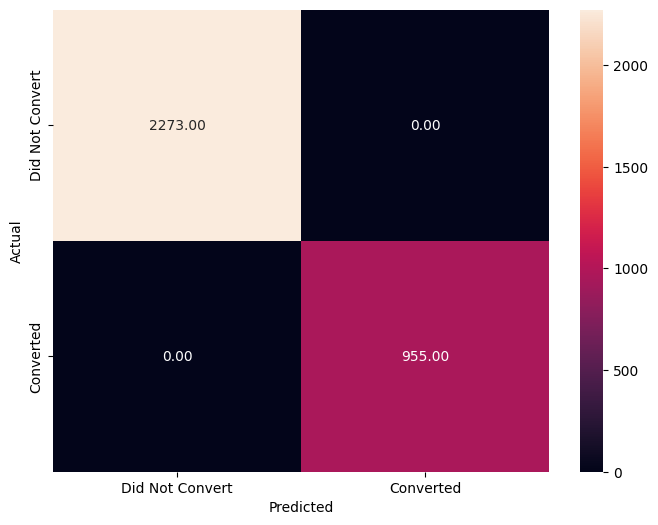

In [ ]:
#Checking the model performance on the Tree:
y_pred_train = dt.predict(X_train)

print(classification_report(y_train,y_pred_train))

cm = confusion_matrix(y_train,y_pred_train)

plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='.2f',xticklabels=['Did Not Convert','Converted'],yticklabels=['Did Not Convert','Converted'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### Observations:
- In the above diagram, we can see that the model perfectly learned the training data having an f1 score of 1.0
  
- Next is to test how the model performs on new unseen data.

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       962
           1       0.68      0.68      0.68       422

    accuracy                           0.80      1384
   macro avg       0.77      0.77      0.77      1384
weighted avg       0.80      0.80      0.80      1384



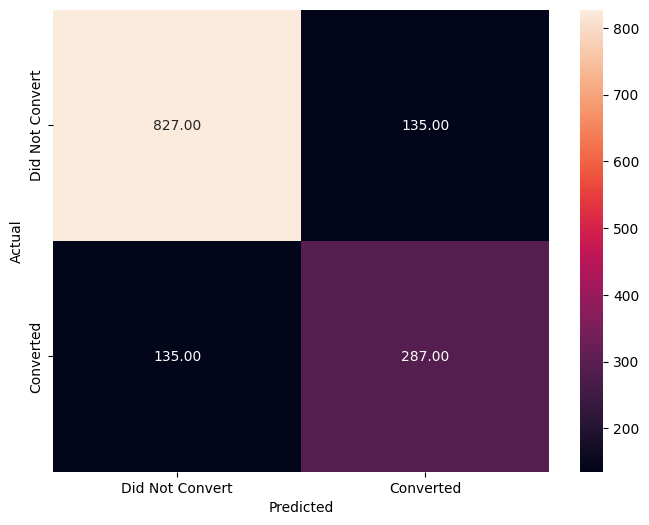

In [ ]:
y_pred_test = dt.predict(X_test)
print(classification_report(y_test,y_pred_test))

cm = confusion_matrix(y_test,y_pred_test)

plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='.2f',xticklabels=['Did Not Convert','Converted'],yticklabels=['Did Not Convert','Converted'])
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

The model looks like it is **Overfitting** it is doing exceptionally well on the training data, but not so well on the test data.

- Precision Score for Class 1: Went down from 1.0 in the training data, to .68. Indicating that 32% of predicted conversions were wrong
  
- Recall Score for Class 1 also went down from 1.0 in the training data to .68. This means that the model missed about 32% of prospects that actually converted.


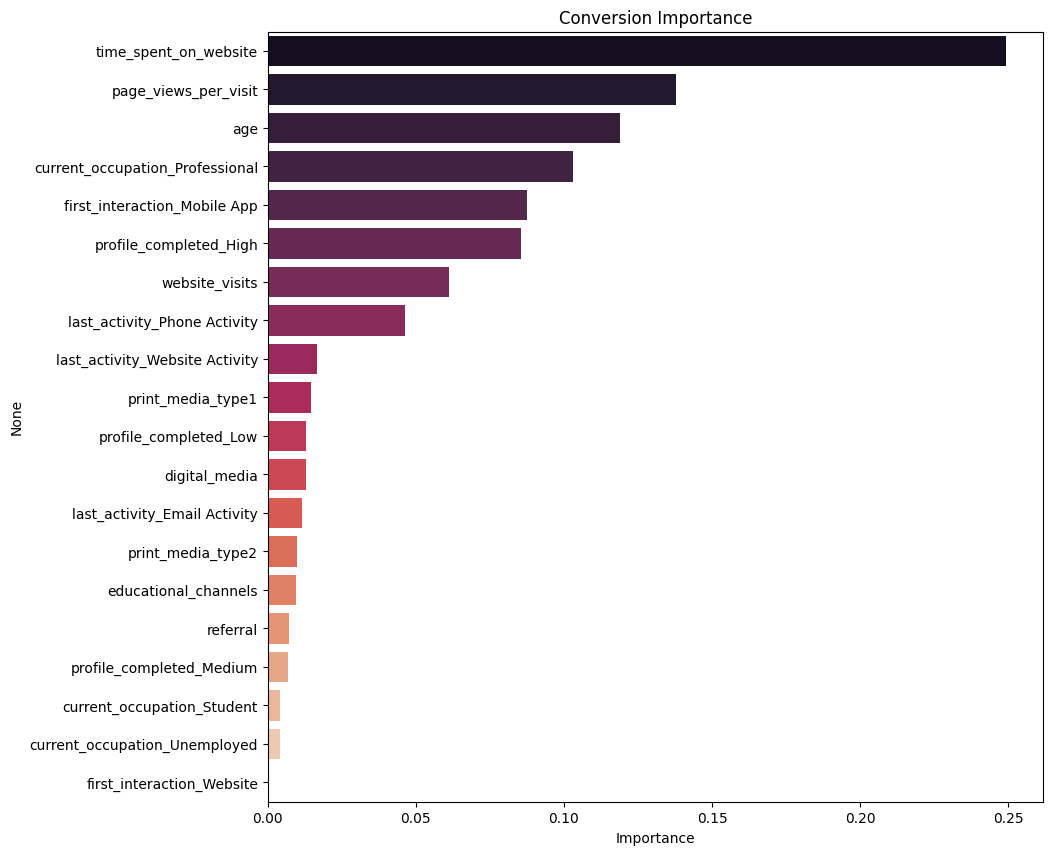

In [ ]:
# Identifying the best features

feature_importance(dt)

### Observations:
From this model, we see that the top 5 indicators for conversions are due to:
- **Time Spent on the website** as the top indicator.
- **Page views per visit**, **Age**, and when a prospect is a **Working Professional**

# Hypertunning the model to see how performance will improve after adjustments

## Decision Tree 2

In [ ]:
#adjusting the paramater

dt2 = DecisionTreeClassifier(class_weight={0:.70,1:.29},criterion='entropy',max_depth=4,random_state=1)
dt2.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={0: 0.7, 1: 0.29}, criterion='entropy',
                       max_depth=4, random_state=1)

              precision    recall  f1-score   support

           0       0.78      0.99      0.87      2273
           1       0.95      0.33      0.49       955

    accuracy                           0.80      3228
   macro avg       0.87      0.66      0.68      3228
weighted avg       0.83      0.80      0.76      3228



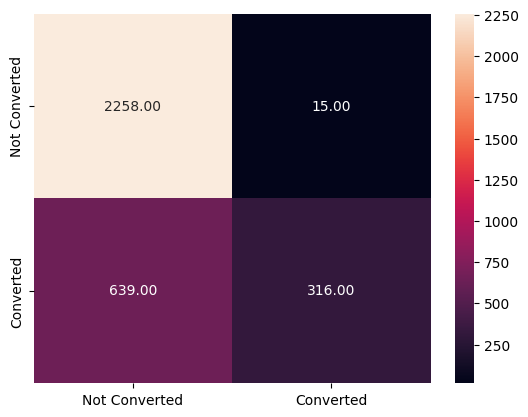

In [ ]:
y_pred_train2 = dt2.predict(X_train)

print(classification_report(y_train,y_pred_train2))
cm2 = confusion_matrix(y_train,y_pred_train2)
sns.heatmap(cm2,annot=True,fmt='.2f',xticklabels=['Not Converted', 'Converted'],yticklabels=['Not Converted','Converted'] )
plt.show()

### Observations:
* With some manual hyperparameter tuning, it looks like the training data is having a harder time learning the data.
* Precision for **Class 0** dropped from 1.0 to .78, Recall shows that the model is still doing a good job catching positives dropping from 1.0 to .99, and the f1 score dropped from 1 to .87
* Precision for **Class 1** only dropped by .05, Recall fell dramatically from 1.0 to .33, the model is missing a lot of positives about 67%., Which leads to a low f1 score of .49

* Let’s see what happens with the testing data


              precision    recall  f1-score   support

           0       0.78      0.99      0.87       962
           1       0.97      0.34      0.51       422

    accuracy                           0.80      1384
   macro avg       0.87      0.67      0.69      1384
weighted avg       0.83      0.80      0.76      1384



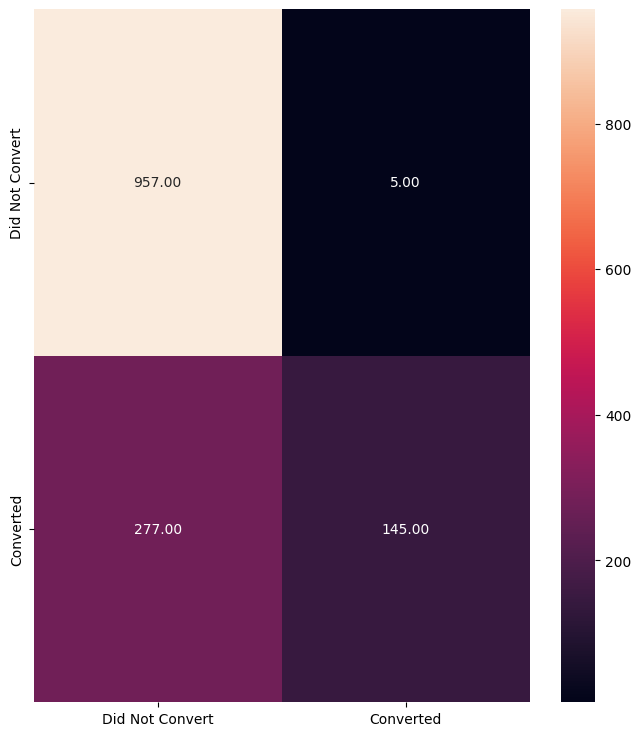

In [ ]:
y_pred_test2 = dt2.predict(X_test)

print(classification_report(y_test,y_pred_test2))

cm = confusion_matrix(y_test,y_pred_test2)

plt.figure(figsize=(8,9))
sns.heatmap(cm,annot=True,fmt='.2f',xticklabels=['Did Not Convert' , 'Converted'],yticklabels=['Did Not Convert','Converted'])
plt.show()

### Observations:

* With adjusting some of the hyperparameters such as the criterion and max_depth, we are still getting just about the same result

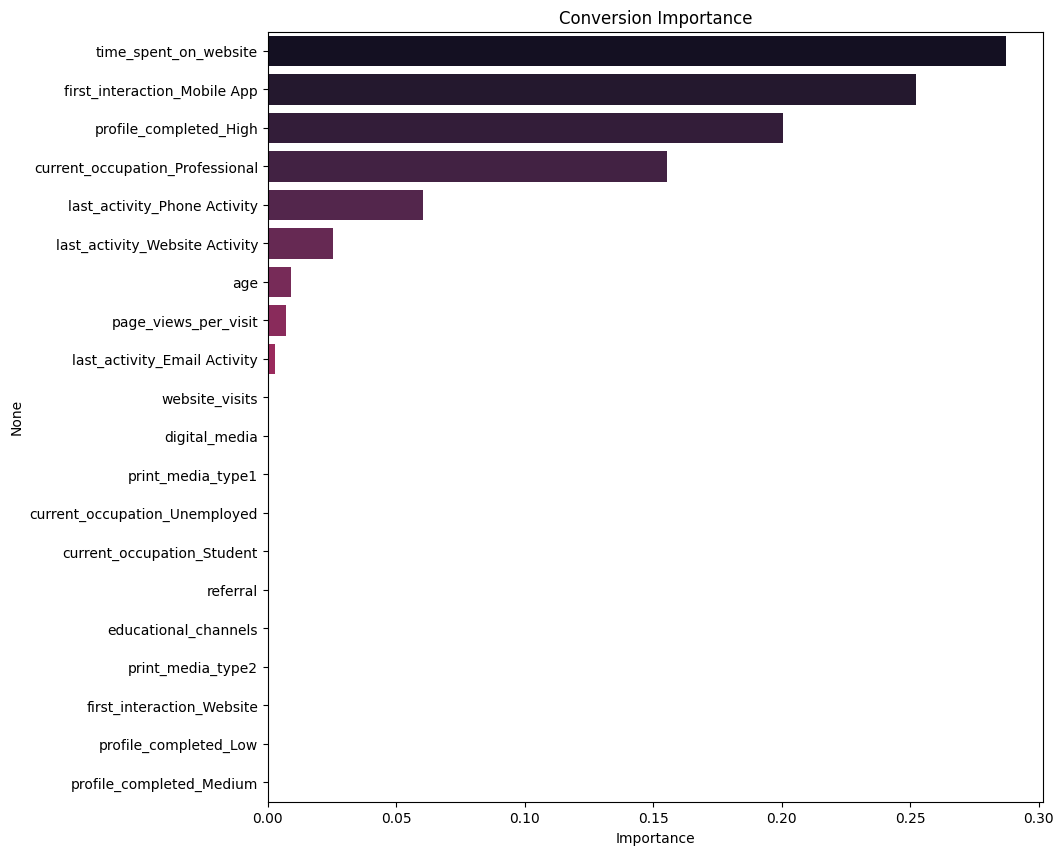

In [ ]:
feature_importance(dt2)

### Observations:
- The Tree is still showing **Time Spent on the Website** as the top feature in regards to how the model preforms.
- However, the difference from the previous model is that here prospects with the **Mobile App** as their first interaction as second highest importance.
- Followed by a **High** completed profile and **Professional** as their current occupation.
- **Age** compared to the previous model, has a much *lower* impact on importance.


## Decision Tree 3

In [ ]:
# Adjusting the Hyperparameters

dt3 = DecisionTreeClassifier(class_weight={0:.70,1:.29},criterion='gini',max_depth=6,min_samples_leaf = 20,random_state=1)

In [ ]:
dt3.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={0: 0.7, 1: 0.29}, max_depth=6,
                       min_samples_leaf=20, random_state=1)

              precision    recall  f1-score   support

           0       0.84      0.98      0.90      2273
           1       0.91      0.55      0.68       955

    accuracy                           0.85      3228
   macro avg       0.87      0.76      0.79      3228
weighted avg       0.86      0.85      0.84      3228



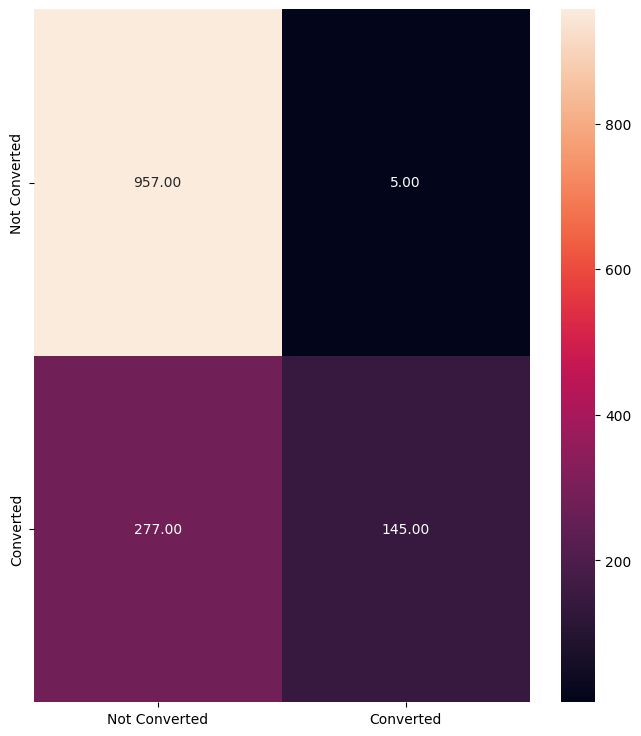

In [ ]:
y_pred_train3 = dt3.predict(X_train)

print(classification_report(y_train,y_pred_train3))

cm3 = confusion_matrix(y_train,y_pred_train3)

plt.figure(figsize=(8,9))
sns.heatmap(cm,annot=True,fmt='.2f',xticklabels=['Not Converted','Converted'],yticklabels=['Not Converted','Converted'])
plt.show()

### Observations:
* This third Decision Tree model is doing slightly better than the second model with the training data, but still not close to the original training.
* ***Precision, Recall, and F1 score*** improved from the previous model.
* Now to examine how the model preforms on new unseen data.



              precision    recall  f1-score   support

           0       0.83      0.97      0.89       962
           1       0.89      0.55      0.68       422

    accuracy                           0.84      1384
   macro avg       0.86      0.76      0.79      1384
weighted avg       0.85      0.84      0.83      1384



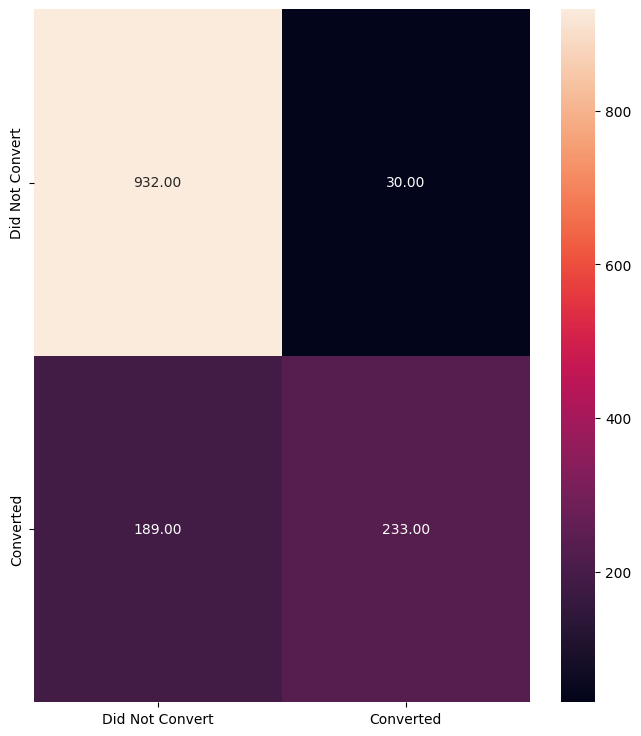

In [ ]:
y_pred_test3 = dt3.predict(X_test)

print(classification_report(y_test,y_pred_test3))

cm3 = confusion_matrix(y_test,y_pred_test3)

plt.figure(figsize=(8,9))
sns.heatmap(cm3,annot=True,fmt='.2f',xticklabels=['Did Not Convert','Converted'],yticklabels=['Did Not Convert','Converted'])
plt.show()


### Observations:
* Compared to the training data, the Tree falls within the same ranges (about 1-5% decrease in precision, recall and f1)
* Recall is still about 55% meaning that the model is missing 45% of actual positives in the dataset.


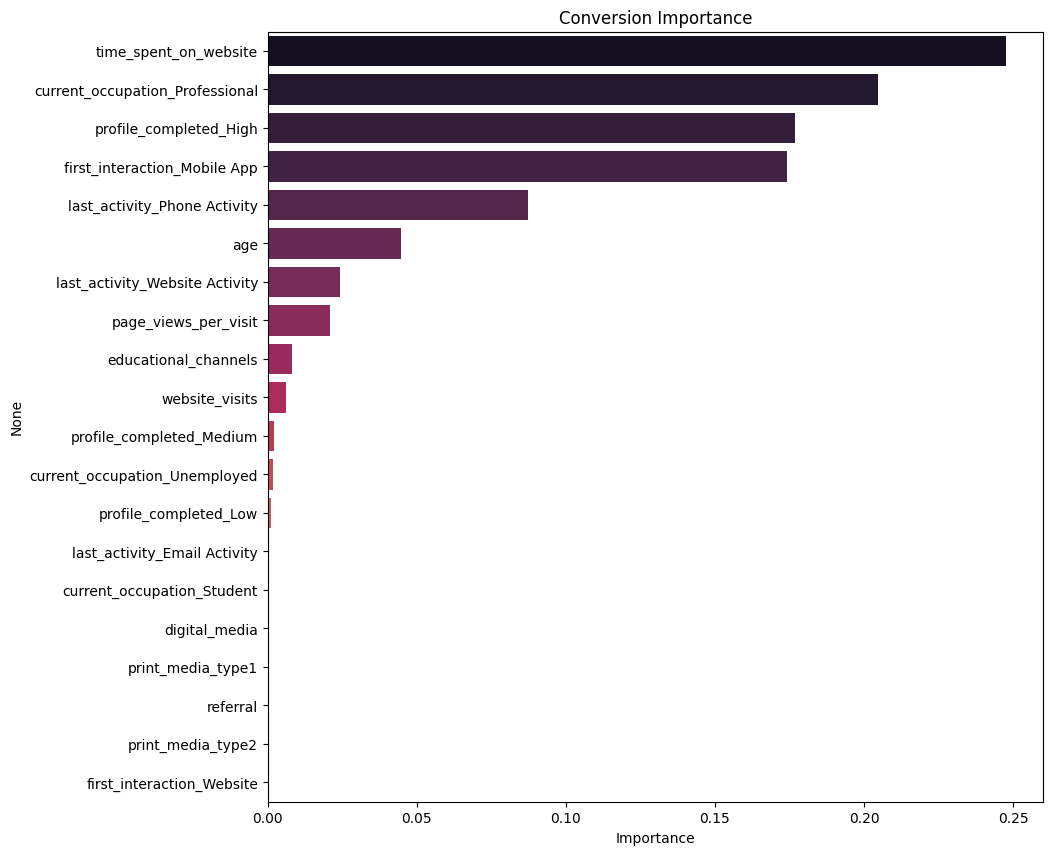

In [ ]:
# Checking Feature Importance
feature_importance(dt3)

### Observations:

* We are starting to see the consistency of Importances within the last few Trees.
* **Time Spent on the Website** still stands out as the top important feature.
* **Professional** Occupation is still considered an important feature, as well as having a **High** completed profile.


## Decision Tree 4

### GridSearch for finding the best Hyperparameter

- Although manual hyperparameter tuning improved performance, the model still underperforms in recall for the positive class, suggesting room for improvement.
- We will use GridSearchCV to test a range of hyperparameters using cross-validation to find the best combination for the model.

In [ ]:
# using grid search
dt_estimator = DecisionTreeClassifier(class_weight={0:.70,1:.29},random_state=1)

parameters = {'max_depth': np.arange(2,8),
              'criterion':['gini','entropy'],
              'min_samples_leaf': [5,10,20,25]
             }
scorer = metrics.make_scorer(recall_score,pos_label=1)

gridCV = GridSearchCV(dt_estimator,parameters,scoring = scorer,cv =10)

gridCV = gridCV.fit(X_train,y_train)

dt_estimator = gridCV.best_estimator_

dt_estimator.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={0: 0.7, 1: 0.29}, max_depth=np.int64(6),
                       min_samples_leaf=5, random_state=1)

              precision    recall  f1-score   support

           0       0.85      0.97      0.90      2273
           1       0.90      0.58      0.70       955

    accuracy                           0.86      3228
   macro avg       0.87      0.77      0.80      3228
weighted avg       0.86      0.86      0.84      3228



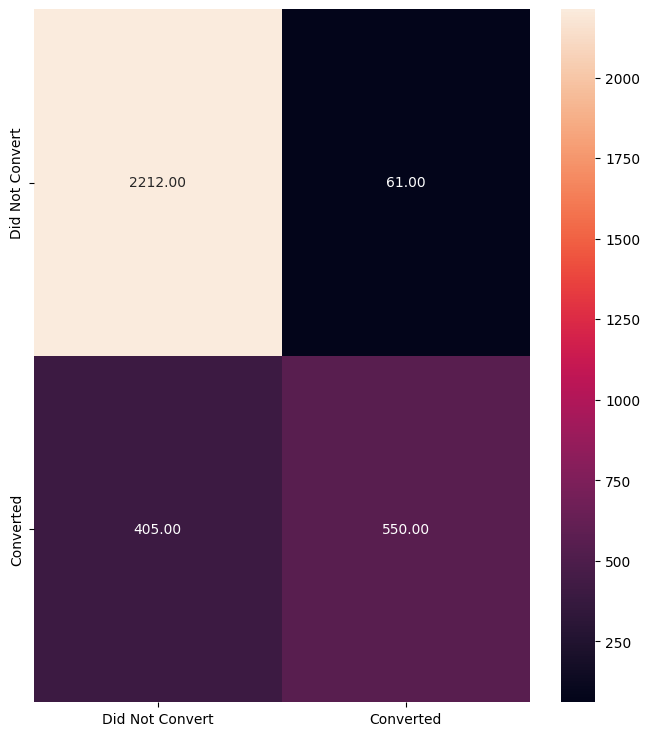

In [ ]:
y_pred_train4 = dt_estimator.predict(X_train)

print(classification_report(y_train,y_pred_train4))

cm = confusion_matrix(y_train,y_pred_train4)

plt.figure(figsize=(8,9))
sns.heatmap(cm,annot=True,fmt='.2f',xticklabels=['Did Not Convert','Converted'],yticklabels=['Did Not Convert','Converted'])
plt.show()


### Observations:
* The **training** data for this fourth decision tree increased in accuracy by 1%
* **Recall Score** for *Class 1* is still low at about 58% missing about 42% of positives

              precision    recall  f1-score   support

           0       0.84      0.97      0.90       962
           1       0.89      0.57      0.70       422

    accuracy                           0.85      1384
   macro avg       0.87      0.77      0.80      1384
weighted avg       0.85      0.85      0.84      1384



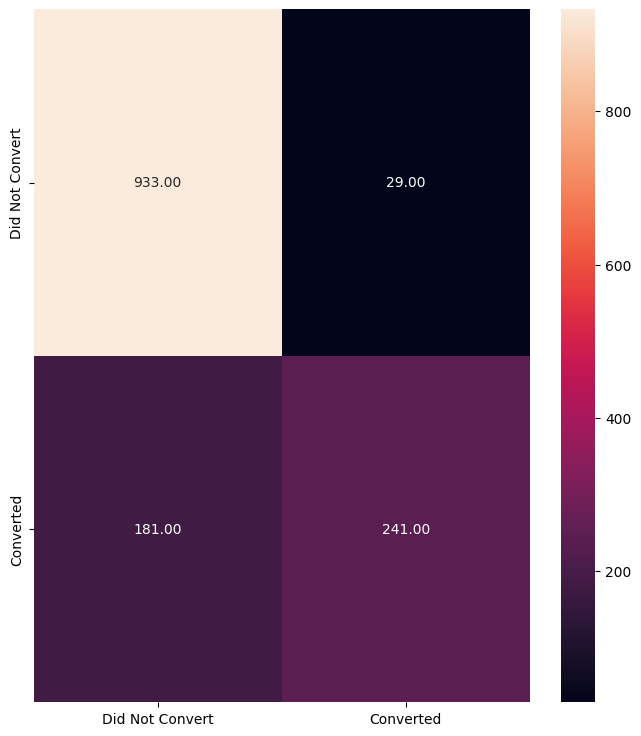

In [ ]:
y_pred_test4 = dt_estimator.predict(X_test)

print(classification_report(y_test,y_pred_test4))

cm = confusion_matrix(y_test,y_pred_test4)

plt.figure(figsize=(8,9))
sns.heatmap(cm,annot=True,fmt='.2f',xticklabels=['Did Not Convert','Converted'],yticklabels=['Did Not Convert','Converted'])
plt.show()

### Obsevations:
- The model is still having a hard time correctly predicting positives for **Class 1** (57%)
- However, compared to the previous 2 Trees (Decision Trees 2 and 3), the model has improved *slightly* in accuracy

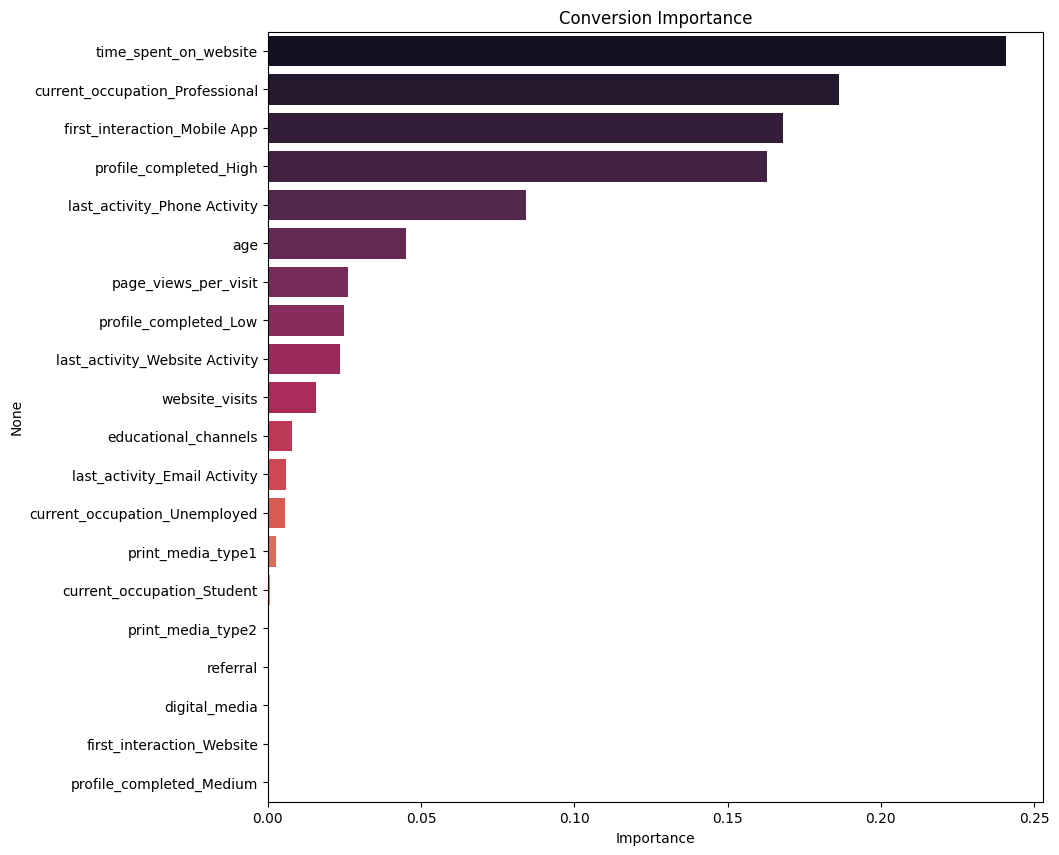

In [ ]:
feature_importance(dt_estimator)

### Observations:
- As with the previous Decision Trees, **Time Spent on the Website** remains as the top feature with the highest level of importance
- **Professional Occupation** remains in the top 3, as well as **Mobile App** being the first interaction most prospects take.
- **Phone Activity** also remains in the greater region of the levels of importance, along with **Age** and **High Profile** completion.

### Visualizing The Tree

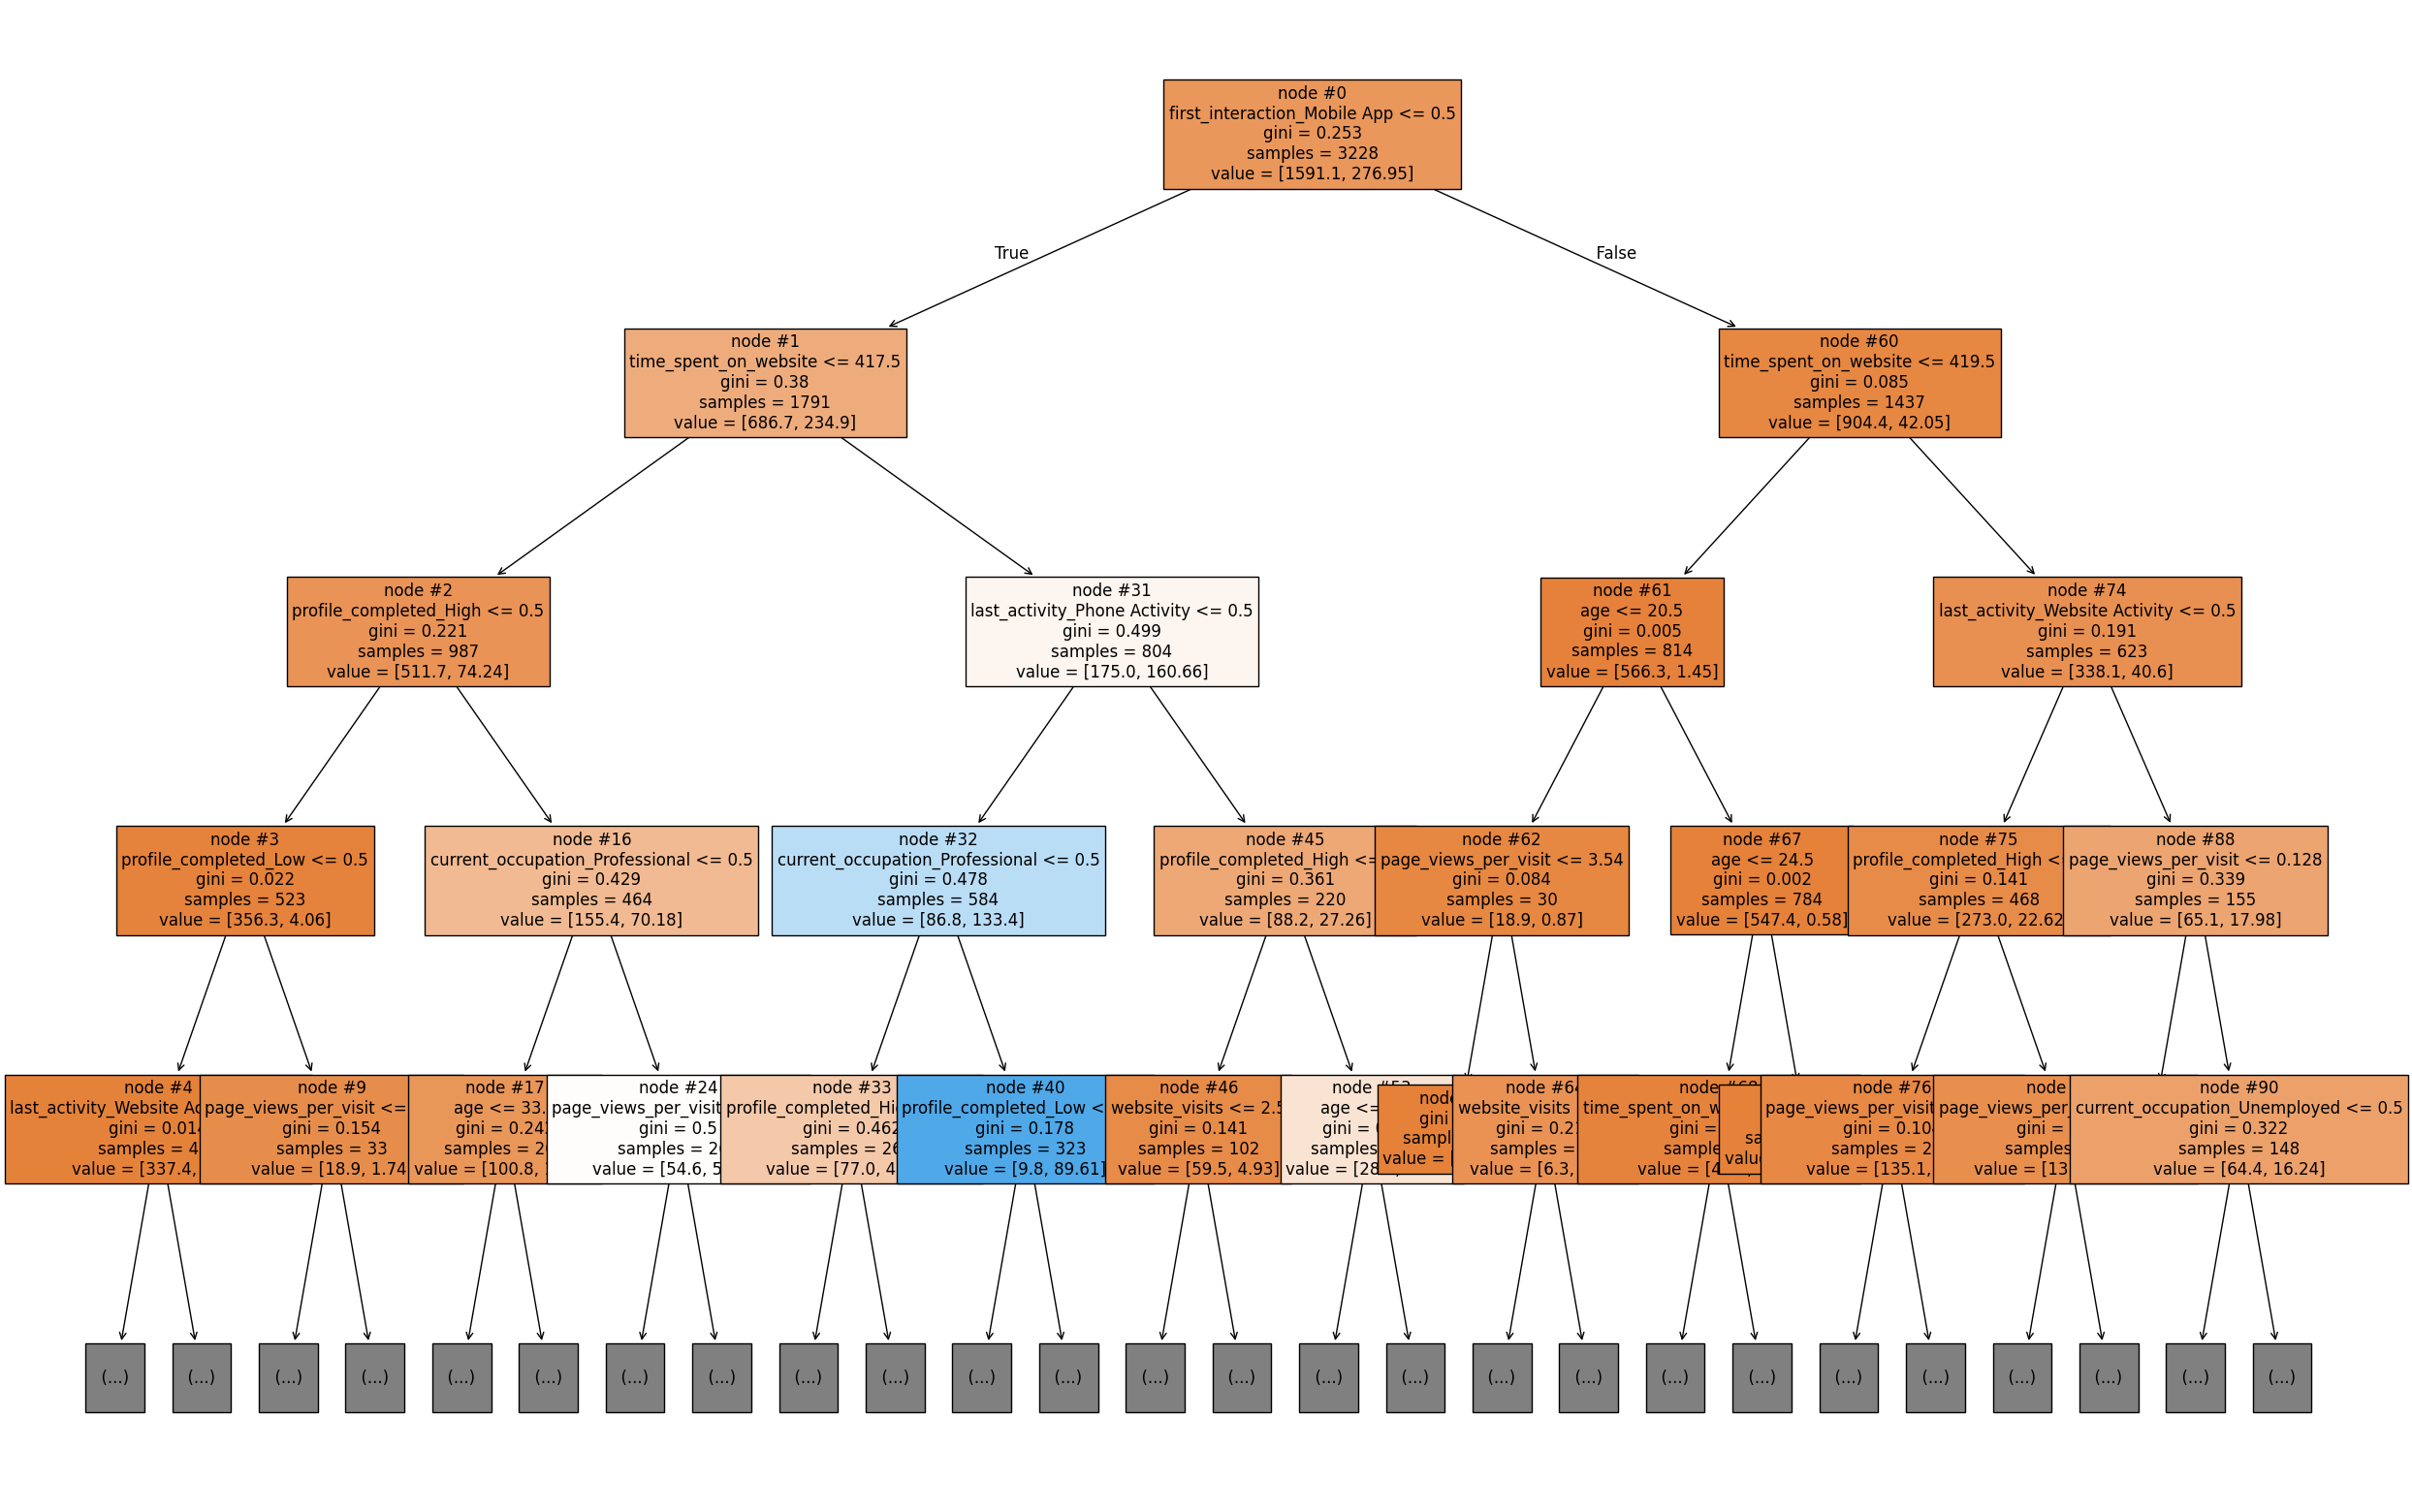

In [ ]:
features = X_dummies.columns.tolist()
plt.figure(figsize=(30,20))
tree.plot_tree(dt_estimator, max_depth = 4, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = None)
plt.show()

## Building a Random Forest model

In [ ]:
# Applying the class weight initially to assist with bias
rf = RandomForestClassifier(class_weight={0:.70,1:.29},random_state=1)

#fit the data to the model

rf.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.7, 1: 0.29}, random_state=1)

## Model Performance evaluation and improvement

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



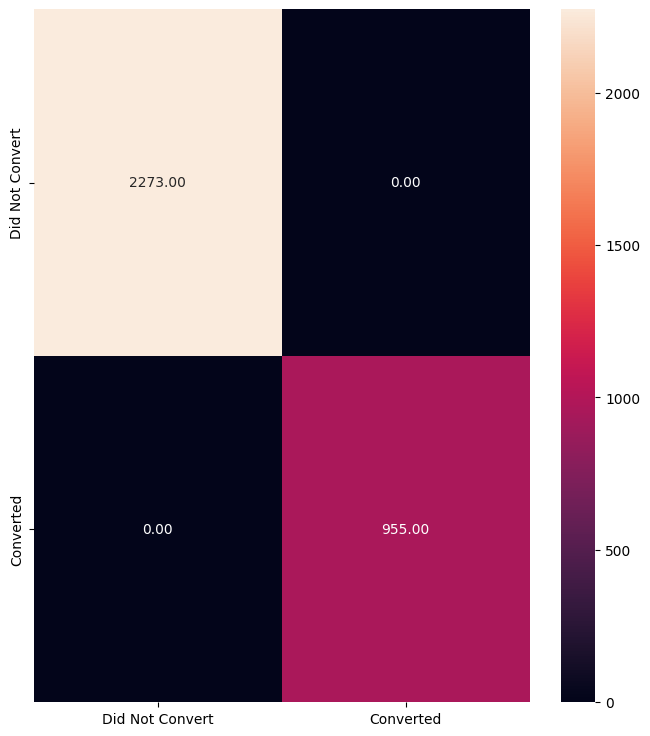

In [ ]:
rf.fit(X_train,y_train)

y_pred_train_rf = rf.predict(X_train)


print(classification_report(y_train,y_pred_train_rf))

cm = confusion_matrix(y_train,y_pred_train_rf)

plt.figure(figsize=(8,9))
sns.heatmap(cm,annot=True,fmt='.2f',xticklabels=['Did Not Convert','Converted'],yticklabels=['Did Not Convert','Converted'])
plt.show()

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       962
           1       0.79      0.71      0.75       422

    accuracy                           0.85      1384
   macro avg       0.83      0.82      0.82      1384
weighted avg       0.85      0.85      0.85      1384



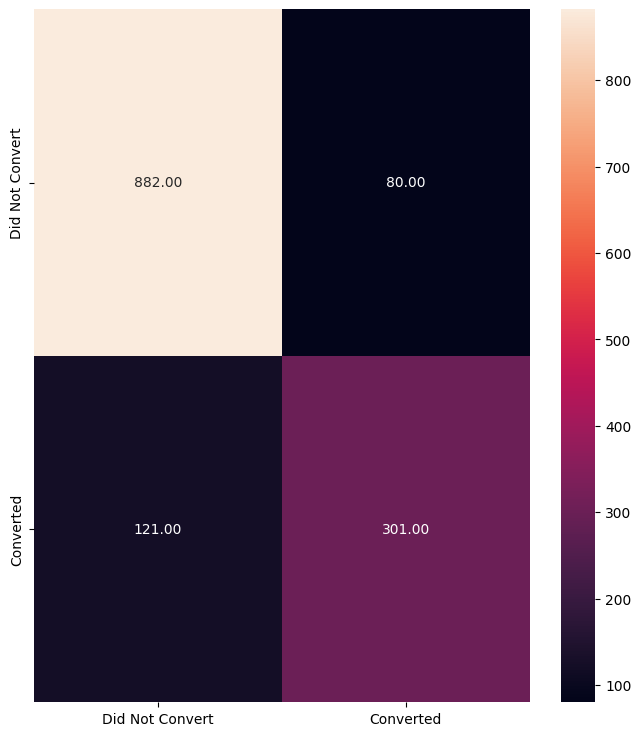

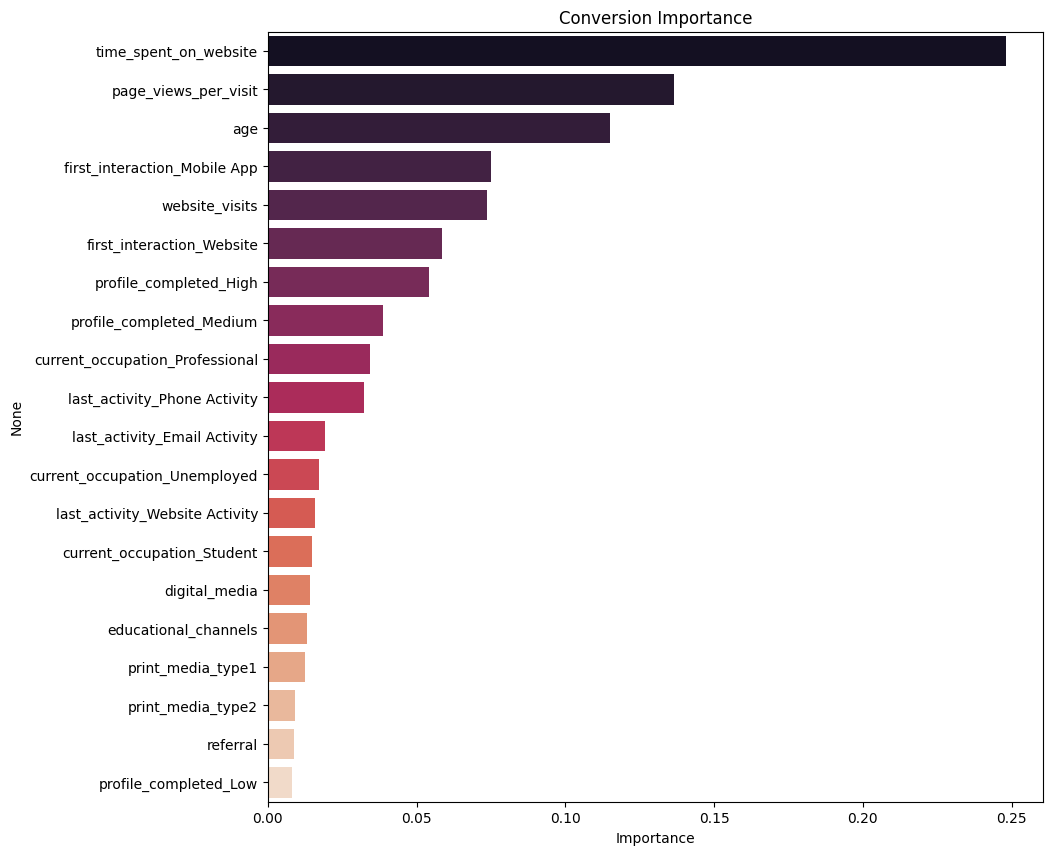

In [ ]:
y_pred_test_rf = rf.predict(X_test)


print(classification_report(y_test,y_pred_test_rf))

cm = confusion_matrix(y_test,y_pred_test_rf)

plt.figure(figsize=(8,9))
sns.heatmap(cm,annot=True,fmt='.2f',xticklabels=['Did Not Convert','Converted'],yticklabels=['Did Not Convert','Converted'])
plt.show()
print('')
feature_importance(rf)

### Observations:
- Compared to the original Decision Tree (*Decision Tree 1*) with the class_weight also tuned, the RandomForest Algorithm helped to improve the model performance.

- For Class 1: Recall improved from ***.55 to .71***, meaning that the Random Forest is catching more converting leads than the decision tree.

- F1-Score improved from .68 to .75 which is indicating a higher balance between how the model is calculating precision and recall.

In terms of important features:
- **Time spent on the website** consistently ranks as the number one important feature across all models that we tested. This suggests that the amount of time an individual spends on the website has a strong influence on whether they convert or not.

- Other consistently important features include **Age**, being a **Professional**, having their first interaction on the **Mobile App**, and having a**High** profile completion status


### Model Tunning

To see if we can improve the model preformance, we will use GridsearchCV to find the best hyperparameters.

In [ ]:
rf_gs = RandomForestClassifier(class_weight={0:.70,1:.29},random_state=1)

parameters_rf = { 'n_estimators': [100,200,300],
                 'max_depth': [10,20,30],
                 'min_samples_split':[2,5,10],
                 'min_samples_leaf':[1,2,4],
                 'max_features':['sqrt','log2']
                }

grid_search = GridSearchCV( estimator=rf_gs, param_grid=parameters_rf,n_jobs=-1,cv =5,verbose=2)


grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=2

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight={0: 0.7, 1: 0.29},
                                              random_state=1),
             param_grid={'max_depth': [10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2273
           1       1.00      0.86      0.92       955

    accuracy                           0.96      3228
   macro avg       0.97      0.93      0.95      3228
weighted avg       0.96      0.96      0.96      3228



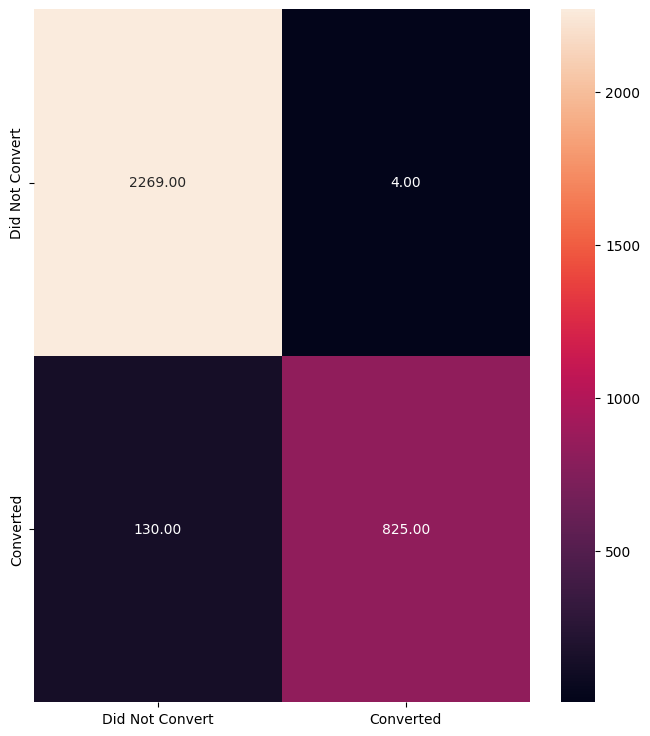

In [ ]:
gs_pred_train = grid_search.predict(X_train)

print(classification_report(y_train,gs_pred_train))

cm = confusion_matrix(y_train,gs_pred_train)

plt.figure(figsize=(8,9))
sns.heatmap(cm,annot=True,fmt='.2f',xticklabels=['Did Not Convert','Converted'],yticklabels=['Did Not Convert','Converted'])
plt.show()

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       962
           1       0.82      0.68      0.74       422

    accuracy                           0.86      1384
   macro avg       0.84      0.81      0.82      1384
weighted avg       0.85      0.86      0.85      1384



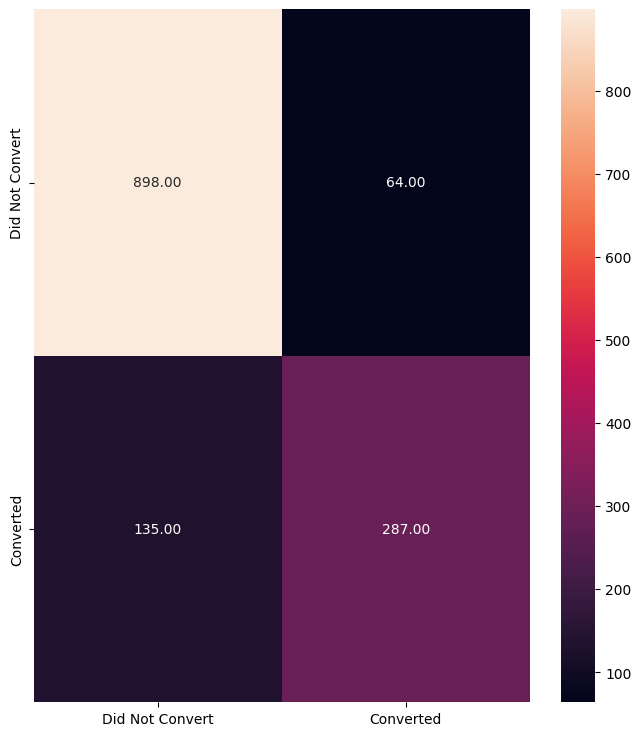

In [ ]:
gs_pred_test = grid_search.predict(X_test)

print(classification_report(y_test,gs_pred_test))

cm = confusion_matrix(y_test,gs_pred_test)

plt.figure(figsize=(8,9))
sns.heatmap(cm,annot=True,fmt='.2f',xticklabels=['Did Not Convert','Converted'],yticklabels=['Did Not Convert','Converted'])
plt.show()


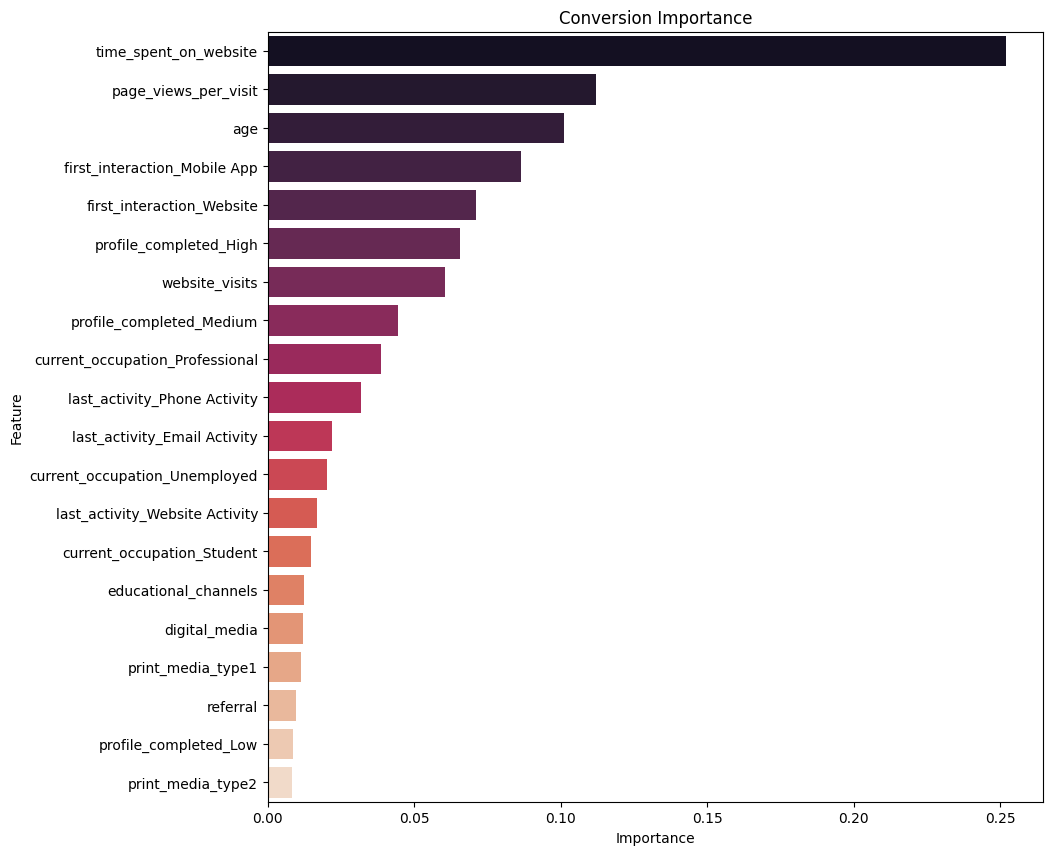

In [ ]:
rf_estimator = grid_search.best_estimator_

rf_fi = rf_estimator.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X_dummies.columns,
    'Importance': rf_fi
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 10))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='rocket')
plt.title('Conversion Importance')
plt.show()

### Observations:
Because our objective is to find factors that drive conversions:
- The model prior to tuning is preforming slightly better particularly with recall.
- Interestingly however, the accuracy score did improve by 1% but for Class recall score fell from 71% to 68%.
- F1 score fell about 1% compared to the original Random Forest Model.

- Again **Time spent on the Website** remains the top important feature from our data.
- Followed by **Page Views Per Visits**, **Age**, and **Mobile App** as first interaction.


## Actionable Insights and Recommendations

In [ ]:
# Generating a DataFrame for Model Results

model_results = {
    'Model': [
        'Decision Tree 1',
        'Decision Tree 2',
        'Decision Tree 3',
        'Decision Tree 4 (Grid Search)',
        'Random Forest',
        'Random Forest (Grid Search)'
    ],
    'Test Accuracy':  [0.84, 0.80, 0.84, 0.85, 0.85,0.86],
    'Precision':      [0.85, 0.83, 0.85, 0.85, 0.85,0.85],
    'Recall':         [0.84, 0.80, 0.84, 0.85, 0.85,0.86],
    'F1 Score':       [0.83, 0.76, 0.83, 0.84, 0.85,0.85]
}

model_comparison = pd.DataFrame(model_results)
model_comparison


,Model,Test Accuracy,Precision,Recall,F1 Score
0,Decision Tree 1,0.84,0.85,0.84,0.83
1,Decision Tree 2,0.80,0.83,0.80,0.76
2,Decision Tree 3,0.84,0.85,0.84,0.83
3,Decision Tree 4 (Grid Search),0.85,0.85,0.85,0.84
4,Random Forest,0.85,0.85,0.85,0.85
5,Random Forest (Grid Search),0.86,0.85,0.86,0.85


In [ ]:
importance_rank = np.arange(1,21)
dt_importance = pd.Series(dt.feature_importances_, index=X_train.columns).sort_values(ascending=False)
dt2_importance = pd.Series(dt2.feature_importances_, index=X_train.columns).sort_values(ascending=False)
dt3_importance = pd.Series(dt3.feature_importances_, index=X_train.columns).sort_values(ascending=False)
dt4_importance = pd.Series(dt_estimator.feature_importances_, index=X_train.columns).sort_values(ascending=False)
rf_importance = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
rf2_importance = pd.Series(rf_estimator.feature_importances_, index=X_train.columns).sort_values(ascending=False)


importance_df = pd.DataFrame({
    'Importance Ranking': importance_rank,
    'Decision Tree 1': dt_importance.index,
    'Decision Tree 2':dt2_importance.index,
    'Decision Tree 3': dt3_importance.index,
    'Decision Tree 4': dt4_importance.index,
    'Random Forest 1': rf_importance.index,
    'Random Forest 2': rf2_importance.index,
})

importance_df.head(5)

,Importance Ranking,Decision Tree 1,Decision Tree 2,Decision Tree 3,Decision Tree 4,Random Forest 1,Random Forest 2
0,1,time_spent_on_website,time_spent_on_website,time_spent_on_website,time_spent_on_website,time_spent_on_website,time_spent_on_website
1,2,page_views_per_visit,first_interaction_Mobile App,current_occupation_Professional,current_occupation_Professional,page_views_per_visit,page_views_per_visit
2,3,age,profile_completed_High,profile_completed_High,first_interaction_Mobile App,age,age
3,4,current_occupation_Professional,current_occupation_Professional,first_interaction_Mobile App,profile_completed_High,first_interaction_Mobile App,first_interaction_Mobile App
4,5,first_interaction_Mobile App,last_activity_Phone Activity,last_activity_Phone Activity,last_activity_Phone Activity,website_visits,first_interaction_Website


# Conclusion and Recommendations


We have explored several models with this dataset to discover what drives prospects who interact with ExtraaLearn to convert to a new lead.

Based off the models, we have decided upon using the Random Forest Model 1 to assist with making predictions.
Out of all the models, Random Forst 1 performed better than the other models specifically how it handles the Positive Class (Class 1)

Accuracy for **Class 1** was .85 meaning that the model is accurate about 85% of the time, which is relatively fair.

Precision score for **Class 1** was .79 meaning 79% of the time the model predicts correctly for the positive class.

Recall score for **Class 1** was .71, meaning the model found 71% of actual positives when trained and tested.

F1-Score for **Class 1** was .75, meaning the model catching actual positives and being correct when predicting positives is moderately strong, however more improvements can be made.

The important factors that drive a prospect to converting into a lead are **Time Spent on Website** , **Age**, **High Completion in Profile**, **Professionals**

### Recommendations:
ExtraaLearn appeals mainly to the working professionals who spend time on the website, and have a high completion status.

To better the chances of a prospect converting into a lead, ExtraaLearn can create targeted ads towards working professionals rather than students or unemployed induvials.

Encourage more features on the website that help guide prospects through a seamless transition to complete their profile and get started with ExtraaLearn material.

If feasible, adding a 5-7 day free trial aim towards professionals may stimulate a higher rate in profile completions, which can lead to higher conversion rates.


In [ ]:
from google.colab import files
files.download("/content/drive/MyDrive/MIT Program Files/Colab Notebooks/Elective Project/Potential Customers Prediction - Ricardo Mirville.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>